In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

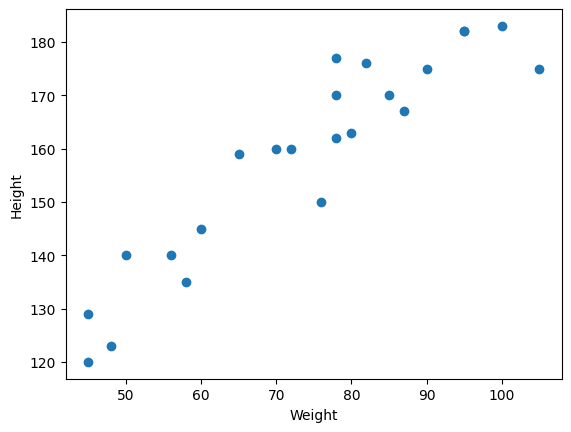

In [6]:
# scatter-plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [7]:
# correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


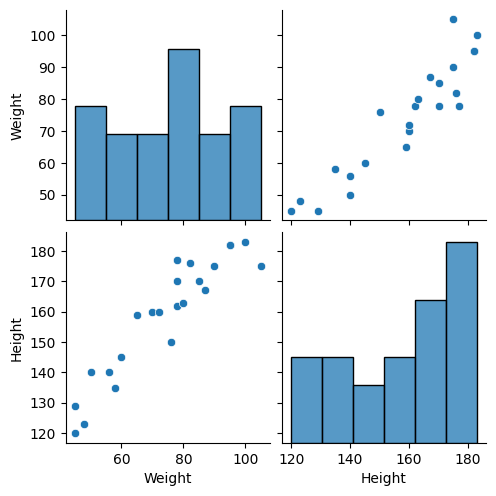

In [8]:
# seaborn for visualisation
import seaborn as sns
sns.pairplot(df)

In [ ]:
# independent & dependent features
''' 
Independent features should always be either DataFrame OR
- a 2-D array
'''

X = df[['Weight']] 
print(np.array(X).shape)
print(type(X))

(23, 1)
<class 'pandas.core.frame.DataFrame'>


In [15]:
''' dependent variable '''
y = df['Height']

In [56]:
# train, test, split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.20, random_state=42)

In [57]:
y_train

12    175
1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64

In [58]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [59]:
X_train.shape

(18, 1)

In [60]:
# standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

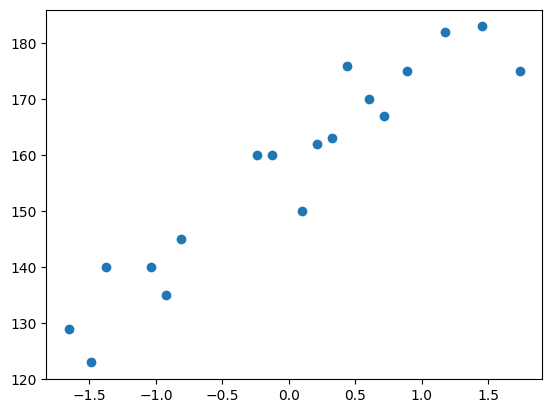

In [62]:
plt.scatter(X_train,y_train)

In [25]:
# apply simple linear regression
from sklearn.linear_model import LinearRegression

In [63]:
regression = LinearRegression()

In [64]:
type(X_train)

numpy.ndarray

In [65]:
regression.fit(X_train, y_train)

LinearRegression()

In [67]:
print("Coefficient or slope =", regression.coef_) # this means, 1 unit of movement in the weight value, there's a difference of ~17.29 units in height
print("Intercept =", regression.intercept_) # this means, when weight=0, at what point does the line meet the y-axis

Coefficient or slope = [17.03440872]
Intercept = 157.5


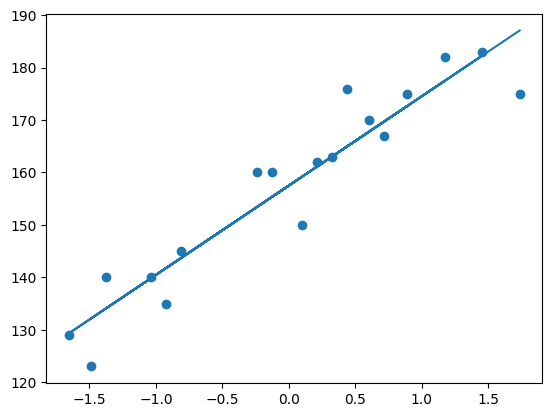

In [69]:
# plot the line of best fit
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

### Prediction of train data
predicted height output= intercept +coef_(Weights)
y_pred_train =65.4364 + 1.26(X_train)

### Prediction of test data
predicted height output= intercept +coef_(Weights)
y_pred_test =65.4364 + 1.26(X_test)

In [70]:
# prediction for test data
y_pred_test = regression.predict(X_test)

In [72]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [43]:
# performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [74]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


### R square

Formula:

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [75]:
from sklearn.metrics import r2_score

In [78]:
score=r2_score(y_test,y_pred_test)
score

0.776986986042344

### Adjusted R-squared

Formula:
1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [83]:
adjusted_r_square = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adjusted_r_square

0.7026493147231252

### Using OLS

In [86]:
!pip install statsmodels
import statsmodels.api as sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 5.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [89]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) 
predictions

array([  3.58467086,   3.58467086, -28.1958439 ,  19.95645118,
        -8.93492586])

In [88]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Fri, 14 Feb 2025   Prob (F-statistic):                       0.661
Time:                        01:03:49   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/harshit/.pyenv/versions/3.10.12/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [91]:
# prediction for NEW DATA
regression.predict(scaler.transform([[72]]))

/Users/harshit/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.30639545])